In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.5 MB/s eta 0:00:00


In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error
import numpy as np
import matplotlib.pyplot as plt



In [5]:
def bv_oracle(n, s, b=0):
    """Build oracle for f(x) = s·x ⊕ b"""
    oracle = QuantumCircuit(n + 1)
    # Apply X to ancilla if b=1
    if b == 1:
        oracle.x(n)
    # Apply CX for each bit where s_i=1
    for i, bit in enumerate(s):
        if bit == '1':
            oracle.cx(i, n)
    return oracle


In [6]:
def bernstein_vazirani_circuit(s, b=0):
    n = len(s)
    qc = QuantumCircuit(n + 1, n)

    # Initialize ancilla in |1⟩
    qc.x(n)
    qc.h(range(n + 1))

    # Apply oracle
    oracle = bv_oracle(n, s, b)
    qc.append(oracle, range(n + 1))

    # Apply H again to input qubits
    qc.h(range(n))

    # Measure input qubits only
    qc.measure(range(n), range(n))
    return qc


Measured bitstring: 1101


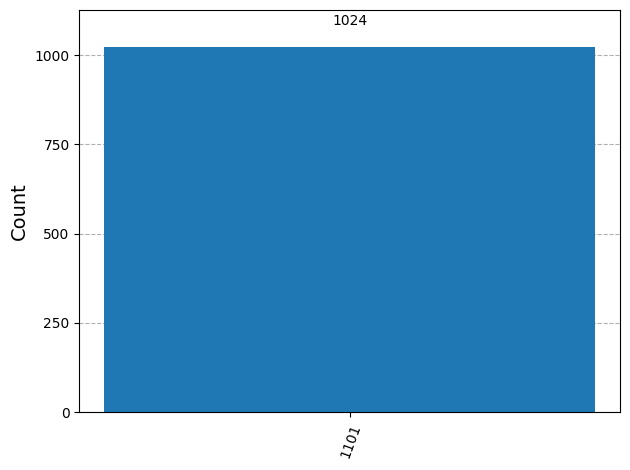

In [7]:
s = '1011'  # secret string
b = 1        # constant bit
sim = AerSimulator()

qc = bernstein_vazirani_circuit(s, b)
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("Measured bitstring:", list(counts.keys())[0])
plot_histogram(counts)


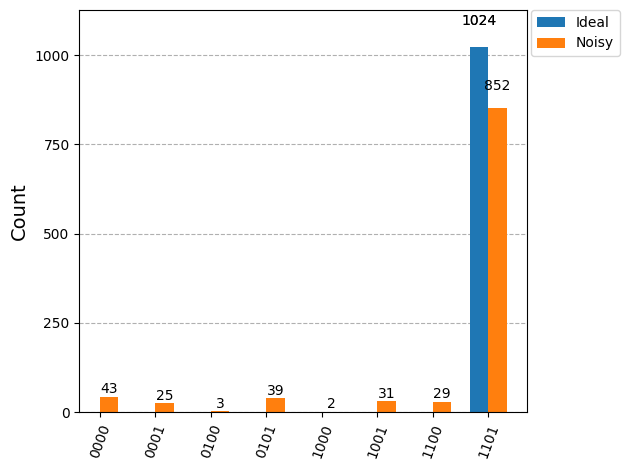

In [9]:
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

# Create a new noise model
noise_model = NoiseModel()

# Define depolarizing errors
error_1 = depolarizing_error(0.02, 1)  # 2% single-qubit noise
error_2 = depolarizing_error(0.05, 2)  # 5% two-qubit noise (for cx gate)

# Add them to the model
noise_model.add_all_qubit_quantum_error(error_1, ['h', 'x'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Create noisy simulator
noisy_sim = AerSimulator(noise_model=noise_model)

# Transpile and run the circuit on the noisy simulator
qc_transpiled = transpile(qc, noisy_sim)
noisy_result = noisy_sim.run(qc_transpiled).result()

# Get counts
noisy_counts = noisy_result.get_counts()

# Compare ideal vs noisy results
plot_histogram([counts, noisy_counts], legend=['Ideal', 'Noisy'])


In [13]:
!pip install qiskit qiskit-ibm-runtime




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.7 MB/s eta 0:00:00


In [28]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.delete_account()


True

In [29]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token="ApiKey-7dd9e836-b4b1-4496-a367-6e9520e526a4"
)




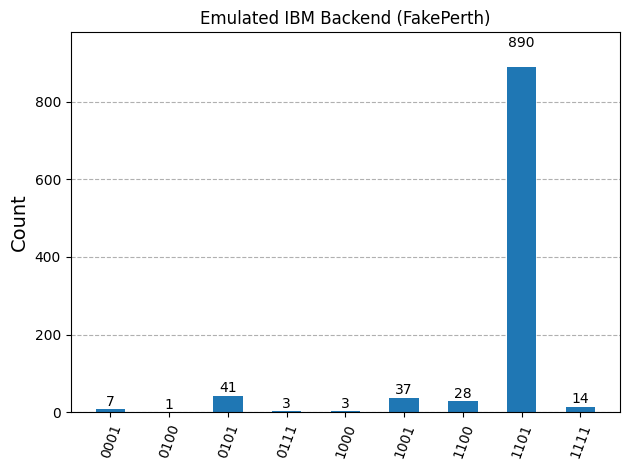

In [31]:
from qiskit_ibm_runtime.fake_provider import FakePerth
from qiskit import transpile
from qiskit.visualization import plot_histogram

backend = FakePerth()
job = backend.run(transpile(qc, backend))
result = job.result()
counts_fake = result.get_counts()

plot_histogram(counts_fake, title="Emulated IBM Backend (FakePerth)")

